In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(2019)

In [3]:
nexp = 5
ntry = 3
x = np.random.uniform(size=(nexp,ntry))
print(x)

[[0.90348221 0.39308051 0.62396996]
 [0.6378774  0.88049907 0.29917202]
 [0.70219827 0.90320616 0.88138193]
 [0.4057498  0.45244662 0.26707032]
 [0.16286487 0.8892147  0.14847623]]


In [4]:
eps = 0.5
s = np.array((x < eps),dtype=int)
print(s)

[[0 1 0]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [1 0 1]]


In [5]:
m = np.sum(s, axis=1)
print(m)

[1 1 0 3 2]


In [6]:
nexp = 1000
ntry = 10
eps  = 0.5
x = np.random.uniform(size=(nexp,ntry))    
s = np.array((x < eps),dtype=int)
m = np.sum(s, axis=1)        

In [7]:
print("mean expected:    ", ntry * eps)
print("mean simulated:   ", np.mean(m))
print("var expected:     ", ntry * eps * (1.0 - eps))
print("var simulated:    ", np.var(m))

mean expected:     5.0
mean simulated:    5.015
var expected:      2.5
var simulated:     2.3847750000000003


In [8]:
def throw_binomial(nexp,ntry,eps,verbose=False,compare=False):
    x = np.random.uniform(size=(nexp,ntry))    
    if verbose: print(x) 
    s = np.array((x < eps),dtype=int)
    if verbose: print(s)
    m = np.sum(s, axis=1)
    if verbose: print(m)
    if compare:                
        print("mean expected:    ", ntry * eps)
        print("mean simulated:   ", np.mean(m))
        print("var expected:     ", ntry * eps * (1.0 - eps))
        print("var simulated:    ", np.var(m))            
    return m

In [9]:
throw_binomial(nexp=5,ntry=3,eps=0.5,verbose=True)

m = throw_binomial(nexp=1000,ntry=10,eps=0.5,compare=True)
#m = throw_binomial(nexp=100000,ntry=10,eps=0.5,verbose=False)

m = throw_binomial(nexp=1000,ntry=20,eps=0.25,compare=True)








[[0.25034561 0.29559538 0.96306425]
 [0.66797756 0.77919331 0.25980222]
 [0.03155755 0.00825747 0.50265333]
 [0.39626862 0.09880622 0.82042356]
 [0.79845405 0.86174022 0.65251657]]
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [0 0 0]]
[2 1 2 2 0]
mean expected:     5.0
mean simulated:    4.925
var expected:      2.5
var simulated:     2.345375
mean expected:     5.0
mean simulated:    5.003
var expected:      3.75
var simulated:     3.670991


In [10]:
nexp = 1000
ntry = 10
eps  = 0.25
m = throw_binomial(nexp=1000,ntry=10,eps=0.25)

In [11]:
counts,edges = np.histogram(m,bins=11,range=(0,11))
print("counts:     ", counts)
print("total:      ", np.sum(counts))
print("bin edges:  ", edges)

counts:      [ 65 172 284 269 122  64  19   4   1   0   0]
total:       1000
bin edges:   [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


edges[:-1]:   [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


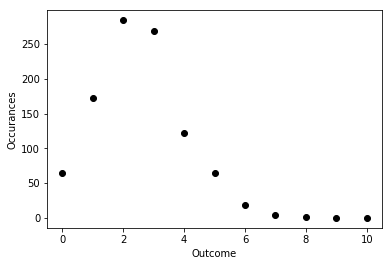

In [12]:
plt.plot(edges[:-1],counts,"ko")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
print("edges[:-1]:  ", edges[:-1])

Text(0,0.5,'Occurances')

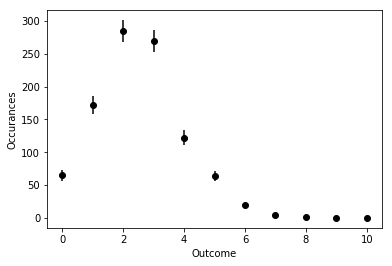

In [13]:
errs = counts**0.5
plt.errorbar(edges[:-1],counts,yerr=errs,fmt="ko")
plt.xlabel("Outcome")
plt.ylabel("Occurances")

Text(0.5,1,'$\\epsilon=0.25$')

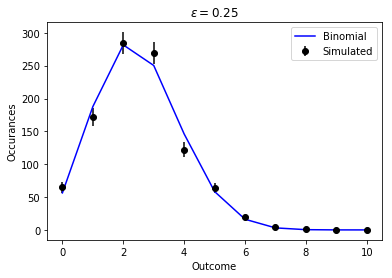

In [14]:
from scipy.stats import binom
errs = counts**0.5
plt.errorbar(edges[:-1],counts,yerr=errs,fmt="ko",
             label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = edges[:-1]
ypred = nexp * binom.pmf(xpred, ntry,eps) 
plt.plot(xpred, ypred,"b-",label="Binomial")
plt.legend()
plt.title("$\epsilon=0.25$")

In [15]:
lamb = 2.0  # new parameter of Poisson distirbution
nexp = 1000
ntry = 1000
eps  = lamb/ntry
print(eps)

0.002


In [16]:
k = throw_binomial(nexp=nexp,ntry=ntry,eps=eps)

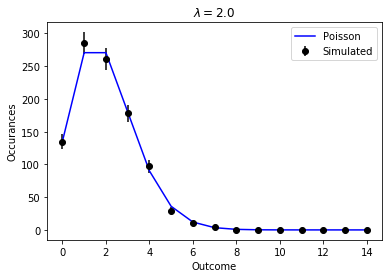

In [17]:
from scipy.stats import poisson
counts,edges = np.histogram(k,bins=15,range=(0,15))
errs = counts**0.5
plt.errorbar(edges[:-1],counts,yerr=errs,fmt="ko",label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = edges[:-1]
ypred = nexp * poisson.pmf(xpred, lamb) 
plt.plot(xpred, ypred,"b-",label="Poisson")
plt.legend()
plt.title("$\lambda=2.0$")
plt.savefig("poisson.pdf")

In [18]:
lamb = 100.0  # new parameter of Poisson distirbution
nexp = 10000
ntry = 10000
eps  = lamb/ntry
print(eps)

0.01


In [19]:
x = throw_binomial(nexp=nexp,ntry=ntry,eps=eps)

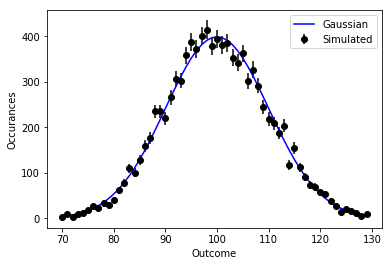

In [20]:
from scipy.stats import norm
counts,edges = np.histogram(x,bins=60,range=(70,130))
errs = counts**0.5
plt.errorbar(edges[:-1],counts,yerr=errs,fmt="ko",label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = edges[:-1]
ypred = nexp * norm.pdf(xpred, loc=lamb, scale=lamb**0.5) 
plt.plot(xpred, ypred,"b-",label="Gaussian")
plt.legend()
plt.savefig("gauss_finebins.pdf")

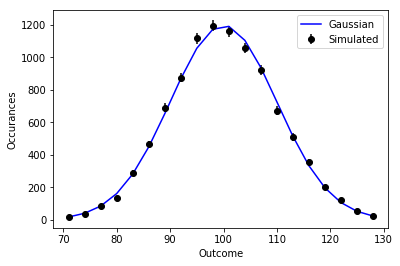

In [21]:
from scipy.stats import norm
counts,edges = np.histogram(x,bins=20,range=(70,130))
errs = counts**0.5
cbins = (edges[:-1]+edges[1:]-1)/2.0
plt.errorbar(cbins,counts,yerr=errs,fmt="ko",label="Simulated")
plt.xlabel("Outcome")
plt.ylabel("Occurances")
xpred = cbins
ypred = 3*nexp * norm.pdf(xpred, loc=lamb, scale=lamb**0.5) 
plt.plot(xpred, ypred,"b-",label="Gaussian")
plt.legend()
plt.savefig("gauss.pdf")

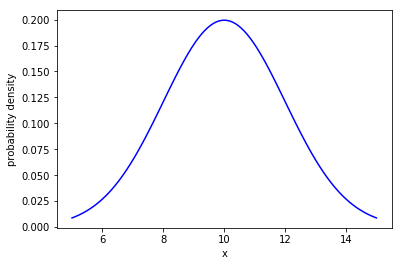

In [22]:
from scipy.stats import norm
mean  = 10.0
sigma =  2.0
x = np.linspace(5.0,15.0,100)
y = norm.pdf(x, loc=mean, scale=sigma) 
plt.xlabel("x")
plt.ylabel("probability density")
plt.plot(x,y,"b-")